# Name :UTHSAVI KP

# Task-2:Prediction using Unsupervised ML

Task details: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset

df = pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# Checking for null values

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# Dropping the 'Id' column as it is not giving us any significant information

df.drop(['Id'],axis=1,inplace=True)

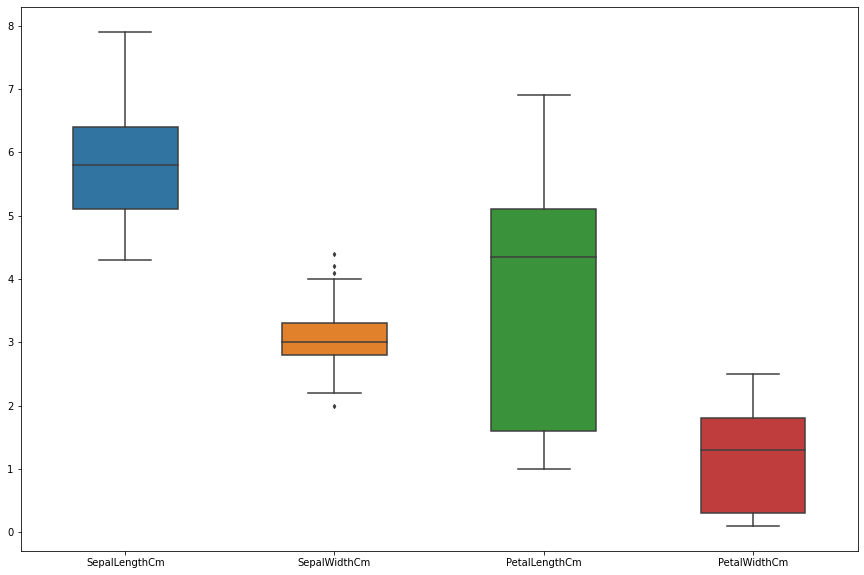

In [10]:
# Checking for outliers

import seaborn as sns
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = df, width = 0.5, ax=ax, fliersize = 3)

## Check for correlation

In [11]:
correlations =  df.corr()

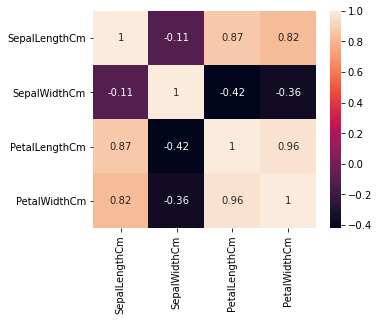

In [12]:
# visualise correlation using heatmap
 
f,ax = plt.subplots(figsize = (5,4))
sns.heatmap(correlations, annot= True)

## Visualise the Data

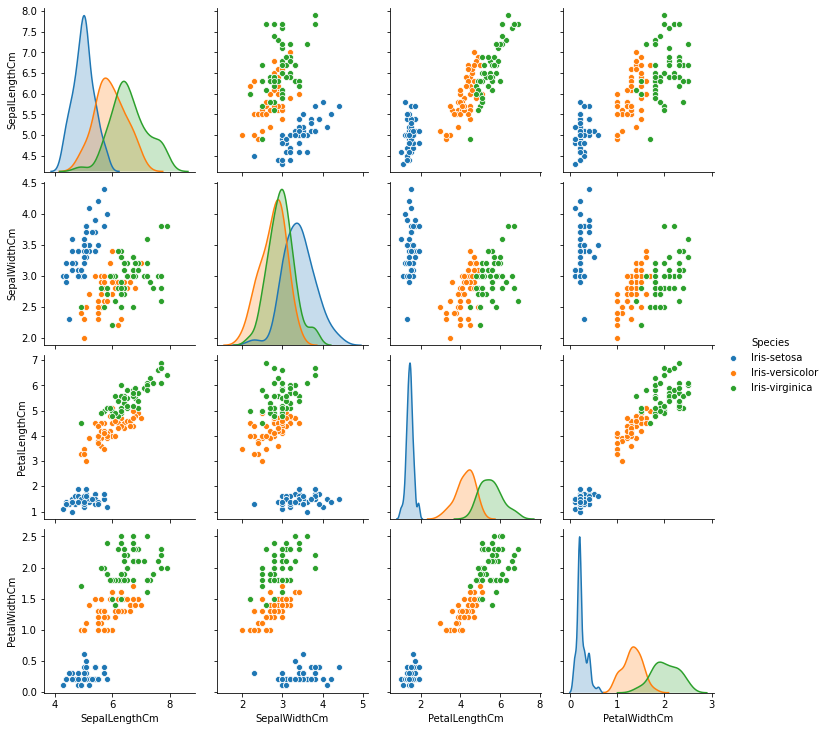

In [13]:
# Visualizing the data using seaborn

sns.pairplot(df, hue ='Species')

In [14]:
# Droping 'Species' column as this is an unsupervised machine learning algorithm and it should not have target variable.

df.drop(['Species'],axis=1,inplace=True)

In [15]:
#Let's scale the data before we begin the modeling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# WSS plot or Elbow Curve for Optimal Cluster Identification

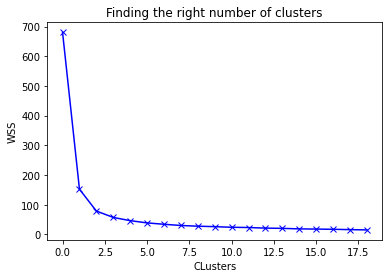

In [16]:
# Obtain the optimal number of clusters(The Elbow method)

from sklearn.cluster import KMeans

scores_1 = []
range_values = range(1,20)

for i in range_values:
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df)
    scores_1.append(kmeans.inertia_)
    
plt.plot(scores_1,'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('CLusters')
plt.ylabel('WSS')
plt.show()
    

## K-Means Clustering

In [17]:
# Building the KMeans model

kmeans = KMeans(3)
kmeans.fit(df)
labels = kmeans.labels_

In [18]:
kmeans.cluster_centers_.shape

(3, 4)

In [19]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,6.850000,3.073684,5.742105,2.071053
1,5.006000,3.418000,1.464000,0.244000
2,5.901613,2.748387,4.393548,1.433871


In [20]:
# Concatenate the cluster labels to our original dataframe

df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})],axis=1)
df_cluster.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Ploting histogram

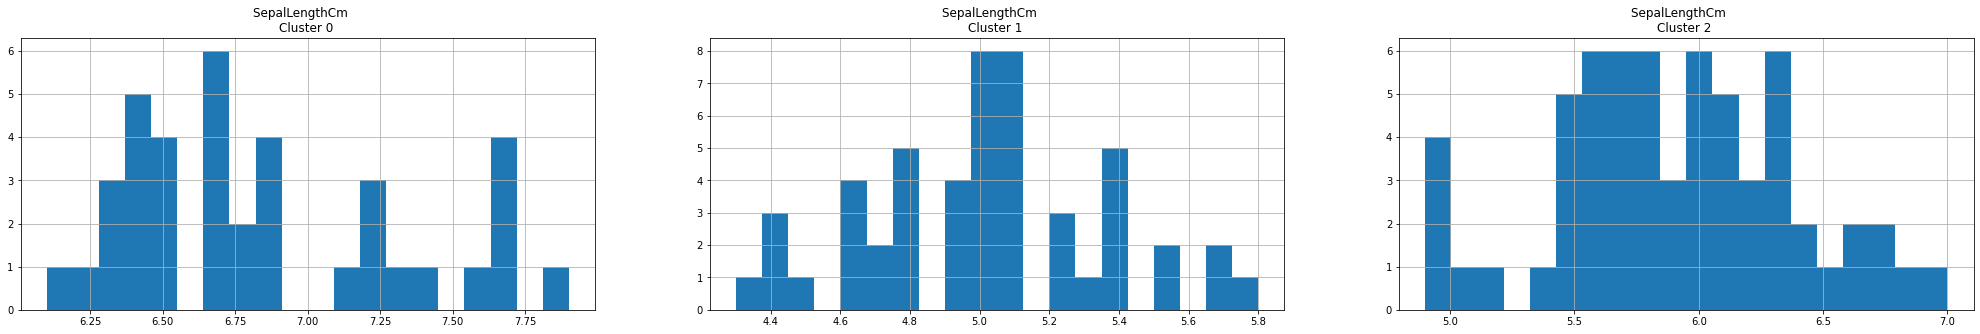

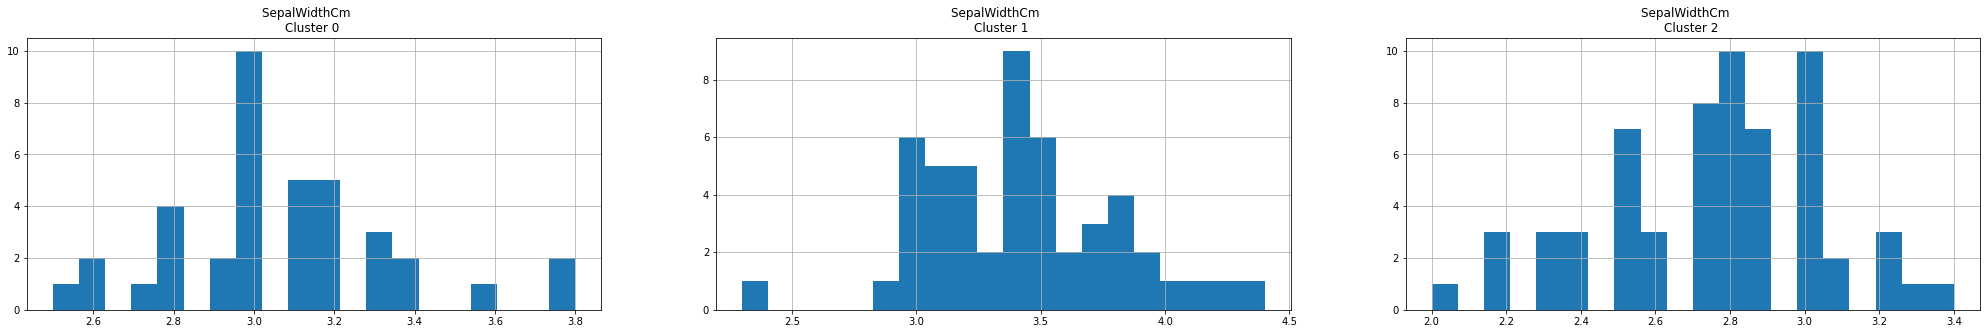

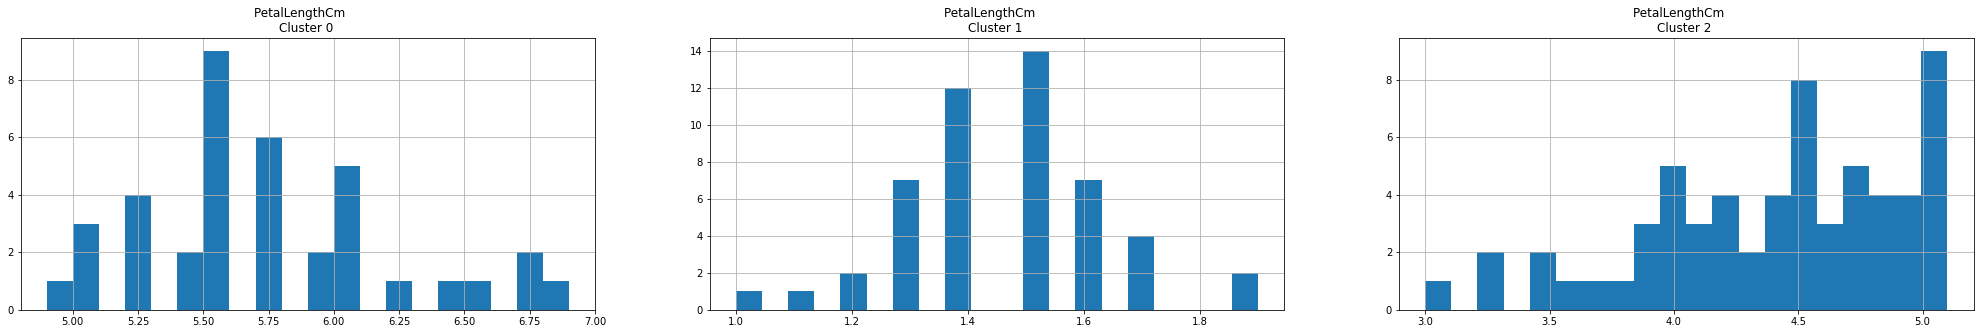

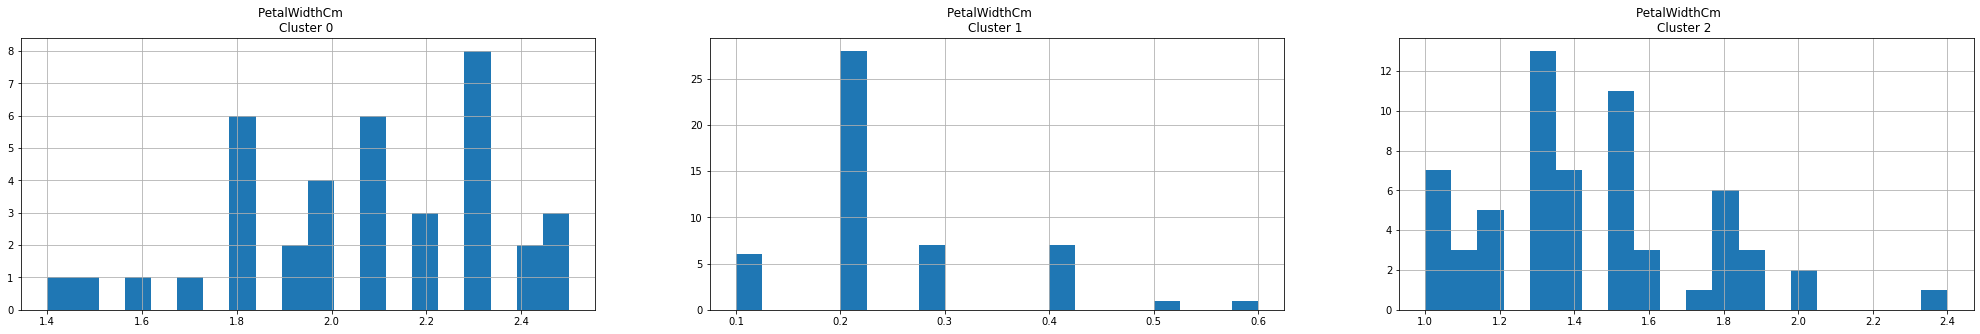

In [21]:
# Plot the histogram of various clusters

for i in df.columns:
    plt.figure(figsize = (35,5))
    for j in range(3):
        plt.subplot(1,3,j+1)
        cluster= df_cluster[df_cluster['cluster']==j]
        cluster[i].hist(bins=20)
        plt.title('{}    \nCluster {} '.format(i,j))
        
    plt.show()   

##   Using Principal Component Analysis (PCA)

In [22]:
# PCA to visualise clusters and to reduce the data into 2 dimension

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

In [23]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [24]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-2.264542,0.505704,1
1,-2.086426,-0.655405,1
2,-2.367950,-0.318477,1
3,-2.304197,-0.575368,1
4,-2.388777,0.674767,1


## Plot the scatter plot to visualise the data

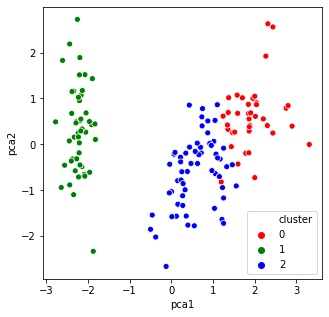

In [25]:
plt.figure(figsize=(5,5))
ax = sns.scatterplot(x='pca1', y='pca2',hue='cluster',data=pca_df, palette=['red','green','blue'])
plt.show()

In [26]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

#### it says that pca1 explains 72.77 % of the variance and pca2 explains 23.03 % of the variance.